Семинар 5 (неделя 6): Точные доверительные интервалы
=====

- [Домашнее задание](#HW)

In [9]:
# Импорт библиотек для работы со статистикой
import numpy as np
import pandas as pd
import scipy.stats as sts

# Импорт библиотек для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Стиль для графиков
plt.style.use('ggplot')
%matplotlib inline

In [10]:
# Функция, которая строит 100(1 - alpha)% асимптотически-нормальный доверительный интервал

def norm_conf_int(alpha, mean_hat, std_hat, margin=5):
    
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = sts.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = sts.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = sts.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

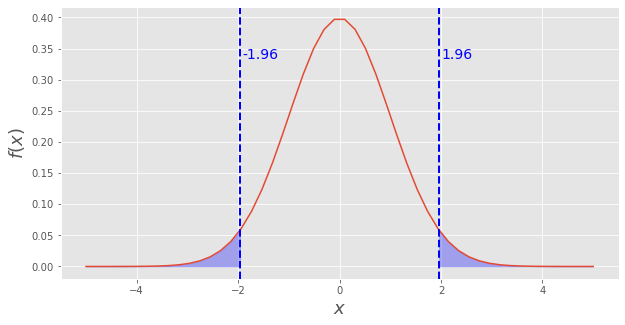

In [11]:
norm_conf_int(alpha = 0.05, mean_hat = 0, std_hat = 1, margin=5);

# 0. Датасет

Характеристики квартир в Москве

In [12]:
df = pd.read_csv('flat.csv', sep=';')
print(df.shape)
df.head()

(2040, 11)


,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


n – номер квартиры по порядку  
price – цена квартиры в $1000  
totsp – общая площадь квартиры, кв.м.  
livesp жилая площадь квартиры, кв.м.  
kitsp – площадь кухни, кв.м.  
dist – расстояние от центра в км.  
metrdist – расстояние до метро в минутах  
walk – 1 – пешком от метро, 0 – на транспорте  
brick 1 – кирпичный, монолит ж/б, 0 – другой  
floor 1 – этаж кроме первого и последнего, 0 – иначе.  
code – число от 1 до 8, при помощи которого мы группируем наблюдения по
подвыборкам:  

1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии
метрополитена
2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена
3. Северо-запад, вокруг Замоскворецкой линии метрополитена
4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
5. Юго-восток, вокруг Люблинской линии метрополитена
6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
7. Восток, вокруг Калиниской линии метрополитена
8. Восток, вокруг Арбатско-Покровской линии метрополитена

## 1. Доверительные интервалы для средних

Построим $95\%$ асимптотический доверительный интервал для средней стоимости квартиры. Построим точный доверительный интервал для средней стоимости квартиры. Какой из них оказался уже? Почему?

__Асимптотический доверительный интервал:__

$$
\mathbb{P} = \left( \bar X - Z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat \sigma^2}{n}} 
\leq \mu \leq \bar X + Z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat \sigma^2}{n}} \right) = 1 - \alpha
$$

$$
\mu = \bar X \pm Z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat \sigma^2}{n}}
$$

$$
\mu = \bar X \pm Z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat s^2}{n}}.
$$

> Предположения: В выборке нет аномалий, собиралась независимо, тогда среднее асимптотически нормально распределено (ЦПТ)

In [13]:
# вручную 
norm_rv = sts.norm()

alpha = 0.05
z_crit = norm_rv.ppf(1 - alpha / 2)

mu_hat = df.price.mean()            # оценка среднего <x>
var_hat = df.price.var(ddof = 1)    # оценка дисперсии s^2, ddof=1 для несмещённости
n = df.price.count()

left = mu_hat - z_crit * np.sqrt(var_hat / n)
right = mu_hat + z_crit * np.sqrt(var_hat / n)

print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}" \
      .format(left, right, right - left))

Доверительный интервал [125.2; 129.7] ширины 4.502


In [14]:
# при помощи пакета stats
mu_hat = df.price.mean() 
sd_hat = df.price.std(ddof = 1) / np.sqrt(n)

sts.norm.interval(0.95, loc = mu_hat, scale = sd_hat)

(125.24534794254012, 129.74778931236185)

(125.24534794254012, 129.74778931236185)

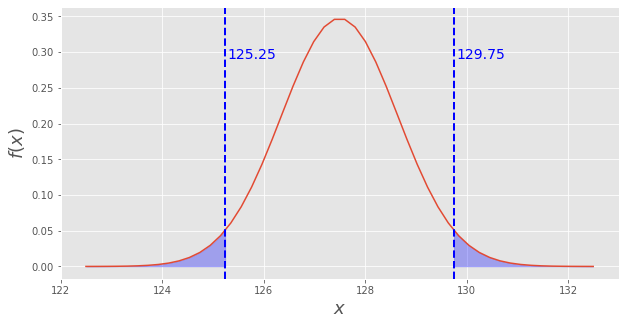

In [15]:
# при помощи функции norm_conf_int()
alpha = 0.05
mu_hat = df.price.mean() 
sd_hat = df.price.std(ddof = 1) / np.sqrt(n)

norm_conf_int(alpha, mu_hat, sd_hat, margin = 5)

__Точный доверительный интервал:__

$$
\bar x \pm t_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat s^2}{n}}.
$$

> Предположения: Выборка пришла из нормального распределения, дисперсия неизвестна

In [16]:
# вручную 
n = df.price.count()
t_rv = sts.t(n - 1)

alpha = 0.05
t_crit = t_rv.ppf(1 - alpha / 2)

mu_hat = df.price.mean() 
var_hat = df.price.var(ddof = 1)


left = mu_hat - t_crit * np.sqrt(var_hat / n)
right = mu_hat + t_crit * np.sqrt(var_hat / n)

print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}" \
      .format(left, right, right - left))

Доверительный интервал [125.2; 129.7] ширины 4.505


In [17]:
# пакетом 
n = df.price.count()
mu_hat = df.price.mean()
sd_hat = df.price.std(ddof = 1) / np.sqrt(n)

# тут 0.95 это 1 - alpha
left, right = sts.t.interval(0.95, df = (n - 1), loc = mu_hat, scale = sd_hat)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}" \
      .format(left, right, right - left))

Доверительный интервал [125.2; 129.7] ширины 4.505


> Видим, что интервалы не сильно отличаются друг от друга, из-за того, что у нас в выборке много наблюдений. При большом числе степеней свободы распределение Стьюдента похоже на нормальное. Тем не менее даже при большом количестве наблюдений точный доверительный интервал оказывается немного шире.

__Построим $99\%$ точные доверительные интервалы для всех районов. В какие из них попало общее среднее? Построим красивую визулизацию.__

In [18]:
df.head()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [19]:
df_agg = df.groupby('code')['price'].agg(['mean', 'std', 'count'])
df_agg

,mean,std,count
code,,,
1,134.411765,49.619507,272
2,110.316279,29.518448,215
3,148.246377,70.573565,345
4,148.693780,73.656832,209
5,115.779762,31.507483,336
6,109.964981,32.976595,257
7,114.230088,33.897495,226
8,136.744444,48.639263,180


In [21]:
alpha = 0.01
df_agg['t_crit'] = df_agg['count'].apply(lambda w: sts.t(w - 1).ppf(1 - alpha/2))

# на сколько отступать вправо и влево от математического ожидания
df_agg['step'] =  df_agg['t_crit']  * df_agg['std']/np.sqrt(df_agg['count'])
df_agg

,mean,std,count,t_crit,step
code,,,,,
1,134.411765,49.619507,272,2.594092,7.804650
2,110.316279,29.518448,215,2.598998,5.232150
3,148.246377,70.573565,345,2.590197,9.841589
4,148.693780,73.656832,209,2.599672,13.245198
5,115.779762,31.507483,336,2.590585,4.452889
6,109.964981,32.976595,257,2.595170,5.338326
7,114.230088,33.897495,226,2.597856,5.857718
8,136.744444,48.639263,180,2.603574,9.438884


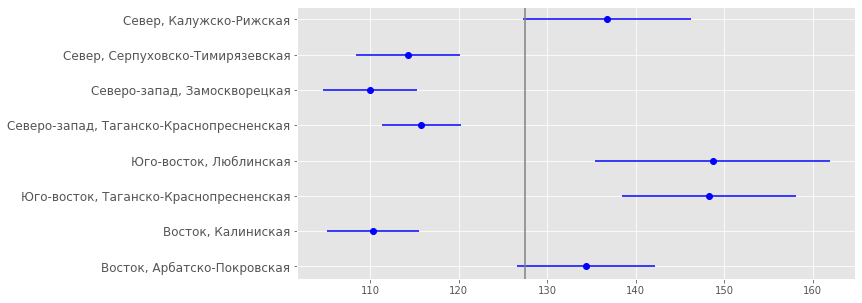

In [22]:
district = [
    'Север, Калужско-Рижская', 'Север, Серпуховско-Тимирязевская', 
    'Северо-запад, Замоскворецкая', 'Северо-запад, Таганско-Краснопресненская', 
    'Юго-восток, Люблинская', 'Юго-восток, Таганско-Краснопресненская',
    'Восток, Калиниская', 'Восток, Арбатско-Покровская'
]

center = df_agg['mean'].values
step = df_agg['step'].values

mu_hat = df.price.mean() # общее среднее 

plt.figure(figsize=(10,5))

plt.errorbar(center, np.arange(center.size),  xerr = step, 
             capsize=0, fmt="o", color="blue")

plt.yticks(np.arange(center.size - 1, -1, -1), district, fontsize=12);
plt.axvline(mu_hat, 0, color='grey');

__Выводы:__

- В среднем, самая дорогая недвижимость находится на Юго-востоке. Самая дешёвая на Северо-западе.

__Пример 1.1__ С целью размещения рекламы опрошено 420 телезрителей, из которых данную передачу смотрят 170 человек. С доверительной вероятностью 91% найти долю телезрителей, охваченных рекламой в лучшем случае.

$$
\hat p \pm t_{1-\frac{\alpha}{2}}(n-1) \sqrt{ \frac{ \hat p (1 - \hat p) }{n}}
$$

In [23]:
p_hat = 170 / 420
p_hat

0.40476190476190477

In [24]:
t_91 = sts.t(420 - 1).ppf(1 - 0.09/2)
t_91

1.6993260243406265

In [25]:
sd = np.sqrt( p_hat * (1 - p_hat) / 420)
sd

0.023950827861992752

In [26]:
( p_hat + t_91 * sd ) * 100

44.54621698522916

## 2. Доверительный интервал для разности средних

Построим $95\%$ асимптотический доверительный интервал для разницы в средней стоимости квартир в монолитных и панельных домах.

$$
\bar x - \bar y \pm z_{crit} \cdot \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}}
$$

In [27]:
x = df[df.brick == 1].price.values
y = df[df.brick == 0].price.values

diff = x.mean() - y.mean() 
nx,ny = x.size, y.size
diff_sd = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)

left, right = sts.norm.interval(0.95, loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}" \
      .format(left, right, right - left))

Доверительный интервал [23.04; 34.81] ширины 11.77


Предположим, что дисперсии неизвестны, но равны.

$$
\bar x - \bar y \pm t_{crit} \cdot \sqrt{\frac{s^2}{n_x} + \frac{s^2}{n_y}}
$$

$$
s^2 = \frac{(n-1)s_x^2 + (m-1)s_y^2}{(n-1)+(m-1)}
$$


In [45]:
diff = x.mean() - y.mean()
nx, ny = x.size, y.size

s2 = ((nx - 1)*x.var() + (ny - 1)*y.var())/(nx + ny - 2)
diff_sd = np.sqrt(s2/nx + s2/ny)

left, right = sts.t.interval(0.95, df=(nx + ny - 2), loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}" \
      .format(left, right, right - left))

Доверительный интервал [2.565e+03; 2.582e+03] ширины 17.18


Предположим, что дисперсии неизвестны и не равны. Построим приближённый доверительный интервал (интервал Уэлча):

$$
\bar x - \bar y \pm t_{crit}(\nu) \cdot \sqrt{\frac{s^2}{n_x} + \frac{s^2}{n_y}}
$$

$$
\nu = \frac{ \left( \frac{s_x^2}{n_x} + \frac{s_y^2}{n_y} \right)^2 }{ \frac{s_x^4}{n_x^2(n_x-1)} + \frac{s_y^4}{n_y^2(n_y-1)} }
$$

$$
\nu =  \left( \frac{s_x^2}{n_x} + \frac{s_y^2}{n_y} \right)^2 \big/ \left( \frac{s_x^4}{n_x^2(n_x-1)} + \frac{s_y^4}{n_y^2(n_y-1)} \right)
$$

In [46]:
diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_sd = np.sqrt(x.var()/nx + y.var()/ny)

u = (x.var() / nx + y.var() / ny) ** 2
d = (x.var()**2) / (nx**2 * (nx - 1)) + (y.var()**2)/ (ny**2* (ny - 1))
nu =  u/d 
print("Число степеней свободы:", nu)

left, right = sts.t.interval(0.95, df=nu, loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}" \
      .format(left, right, right - left))

Число степеней свободы: 1099.2637805594093
Доверительный интервал [2.563e+03; 2.583e+03] ширины 19.78


> Все три доверительных интервала из-за больших объёмов выборки снова оказались похожи. Выборочные дисперсии довольно сильно отличаются друг от друга, из-за этого использование доверительного интервала с предпосылкой о их равенстве некорректно.

__Выводы:__

- В среднем, на уровне значимости $5\%$, квартиры в монолитных домах стоят дороже, чем в панельных. Ноль нигде не попадает в доверительный интервал.

---

__Пример 2.1__ Имеется датасет с количеством аварий в угольных шахтах за 19 и 20 века. Нужно построить оценки $\mu_1$ и $\mu_2$ среднегодового количества аварий, а также сравнить эти два значения, построив 95% доверительный интервал.

In [30]:
coals = pd.read_csv('coals.csv', sep=',')
print(coals.shape)
coals.head()

(112, 2)


,year,count
0,1851,4
1,1852,5
2,1853,4
3,1854,1
4,1855,0


Для начала построим асимптотические интервалы

$$
\mu_i = \hat \lambda_i \pm Z_{1-\frac{\alpha}{2}} \sqrt{ \frac{\hat \lambda_i}{n} }
$$

In [31]:
XIX = coals[coals['year'] <= 1900]
XX = coals[coals['year'] > 1900]
XIX.shape, XX.shape 

((50, 2), (62, 2))

In [32]:
L_xix = XIX['count'].mean()
L_xx = XX['count'].mean()
L_xix, L_xx

(2.7, 0.9032258064516129)

In [33]:
np.sqrt(L_xix), np.sqrt(L_xx)

(1.6431676725154984, 0.9503819266229829)

In [34]:
XIX['count'].var(ddof=1), XX['count'].var(ddof=1)

(2.9489795918367343, 1.1052353252247484)

In [35]:
s_hat = np.sqrt(L_xix / XIX.size)
left_a, right_a = sts.norm.interval(0.95, loc = L_xix, scale =  s_hat)
print("Асимптотический ДИ [{:.4}; {:.4}] ширины {:.4}" \
      .format(left_a, right_a, right_a - left_a))

Асимптотический ДИ [2.378; 3.022] ширины 0.6441


А теперь построим точные интервалы

$$
\mu_i = \hat \lambda_i \pm t_{1-\frac{\alpha}{2}}(n_i-1) \sqrt{ \frac{\hat \lambda_i}{n} }
$$

In [36]:
left_e, right_e = sts.t.interval(0.95,  df = (XIX.size - 1), loc = L_xix, scale =  s_hat)
print("Точный ДИ [{:.4}; {:.4}] ширины {:.4}" \
      .format(left_e, right_e, right_e - left_e))

Точный ДИ [2.374; 3.026] ширины 0.6521


Построим асимптотический доверительный интервал для разницы средних:

$$
\mu_{xix} - \mu_{xx} = (\hat \lambda_{xix} - \hat \lambda_{xx}) \pm Z_{1-\frac{\alpha}{2}} \sqrt{ \frac{\hat \lambda_{xix}}{n_{xix}} + \frac{\hat \lambda_{xx}}{n_{xx}} }
$$

In [37]:
diff = L_xix - L_xx 
n_xix, n_xx = XIX.size, XX.size
diff_sd = np.sqrt( L_xix / n_xix + L_xx / n_xx )

left, right = sts.norm.interval(0.95, loc = diff, scale = diff_sd)
print("Асимптотический ДИ [{:.4}; {:.4}] ширины {:.4}" \
      .format(left, right, right - left))

Асимптотический ДИ [1.434; 2.16] ширины 0.7258


Точный доверительный интервал для разности средних:

$$
\mu_{xix} - \mu_{xx} = (\hat \lambda_{xix} - \hat \lambda_{xx}) \pm t_{1-\frac{\alpha}{2}}(n_{xix}+n_{xx}-2) \sqrt{ \frac{\hat S^2}{n_{xix}} + \frac{\hat S^2}{n_{xx}} }
$$

$$
\hat S^2 = \frac{(n_{xix}-1)\lambda_{xix} + (n_{xx}-1)\lambda_{xx}}{n_{xix}+n_{xx}-2}
$$

In [38]:
diff_L = L_xix - L_xx

S2_hat = ( (n_xix - 1) * L_xix + (n_xx - 1) * L_xx) / ( n_xix + n_xx - 2 )

diff_sd = np.sqrt( S2_hat / n_xix + S2_hat / n_xx)


left, right = sts.t.interval( 0.95, df = (n_xix + n_xx - 2), loc = diff_L, scale = diff_sd )
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}" \
      .format(left, right, right - left))

Доверительный интервал [1.451; 2.143] ширины 0.6916


Невозможно точно сравнить средние двух независимых выборок, дисперсии которых неизвестны. Аппроксимация 

$$
\bar x - \bar y \pm t_{crit}(\nu) \cdot \sqrt{\frac{s^2}{n_x} + \frac{s^2}{n_y}}
$$

$$
s^2 = \frac{(n-1)s_x^2 + (m-1)s_y^2}{(n-1)+(m-1)}
$$

$$
\nu =  \left( \frac{s_x^2}{n_x} + \frac{s_y^2}{n_y} \right)^2 \big/ \left( \frac{s_x^4}{n_x^2(n_x-1)} + \frac{s_y^4}{n_y^2(n_y-1)} \right)
$$

хорошо работает, если $n_x = n_y$ либо знак неравенства между $n_x$ и $n_y$ такой же, как между $\sigma_x$ и $\sigma_y$.

В нашей ситуации

$$
(n_{xix} = 50) < (n_{xx} = 62)
$$ 

но при этом 
$$
(\sqrt{L_{xix}} = \sqrt{2.95} = 1.64) > (\sqrt{L_{xx}} = \sqrt{0.91} = 0.95)
$$

## 3. Доверительный интервал для дисперсии

Предполагая нормальность распределения цен, построим $95\%$ доверительный интервал для дисперсии стоимости квартир.

$$
\frac{(n - 1) \cdot s^2}{\chi_{n-1}^2 \left(\frac{\alpha}{2} \right)} \le \sigma^2 \le \frac{(n - 1) \cdot s^2}{\chi_{n-1}^2 \left(1 - \frac{\alpha}{2} \right)}
$$

> Предположения: Выборка пришла из нормального распределения, математическое ожидание неизвестно, выполняется теорема Фишера

__Определение:__  случайная величина $Y = X_1^2 + \ldots X_k^2$ имеет распределение хи-квадрат с $k$ степенями свободы. Кратко это записывают как $Y \sim \chi^2_k.$

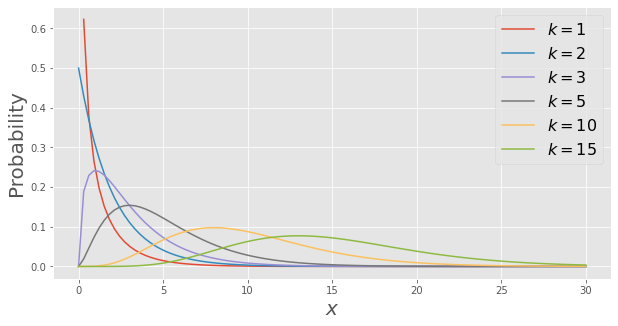

In [39]:
plt.figure(figsize=(10, 5))

x = np.linspace(0,30,100)
for k in [1, 2, 3, 5, 10, 15]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
#plt.title("PDF ($\chi^2_k$)");

plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);

In [40]:
alpha = 0.1

n = df.price.count()
var_hat = df.price.var(ddof=1)

chi_l, chi_u = sts.chi2.ppf([1-alpha/2, alpha/2], df = n - 1)

left = (n - 1) * var_hat/chi_l
right = (n - 1) * var_hat/chi_u

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.5}" \
      .format(left, right, right - left))


Доверительный интервал [2558.2; 2835.8] ширины 277.68


In [41]:
var_hat

2691.3496694361866

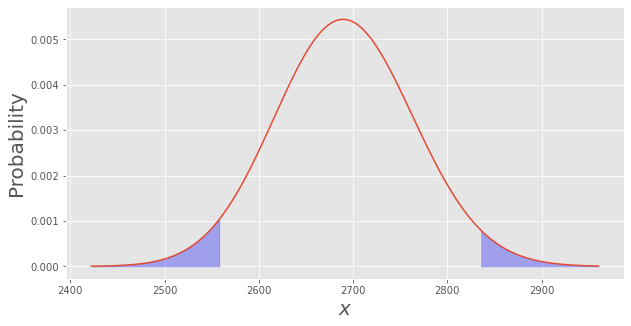

In [42]:
plt.figure(figsize=(10, 5))

x = np.linspace(var_hat * 0.9, var_hat * 1.1, 1000)
rv = sts.chi2(var_hat)
pdf = rv.pdf(x)
plt.plot(x, pdf)

#xq = np.linspace(right, mean_hat + margin)
xq_l = np.linspace(var_hat * 0.9, left)
yq_l = sts.chi2(var_hat).pdf(xq_l)
xq_u = np.linspace(right, var_hat * 1.1)
yq_u = sts.chi2(var_hat).pdf(xq_u)


plt.fill_between(xq_l, 0, yq_l, color='blue', alpha=0.3)
plt.fill_between(xq_u, 0, yq_u, color='blue', alpha=0.3)
plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20);


Сделаем то же самое, но в разбивке по районам.

In [43]:
df_agg = df.groupby('code')['price'].agg(['var', 'count'])

alpha = 0.05
df_agg['ch_l'] = df_agg['count'].apply(lambda w: sts.chi2.ppf(1-alpha/2, df = w - 1))
df_agg['ch_u'] = df_agg['count'].apply(lambda w: sts.chi2.ppf(alpha/2, df = w - 1))

df_agg['left'] =  (df_agg['count'] - 1) * df_agg['var']/df_agg['ch_l']
df_agg['right'] =  (df_agg['count'] - 1) * df_agg['var']/df_agg['ch_u']

df_agg

,var,count,ch_l,ch_u,left,right
code,,,,,,
1,2462.095507,272,318.493509,227.293087,2094.949704,2935.539707
2,871.338752,215,256.407893,175.378164,727.226026,1063.225252
3,4980.628075,345,397.276692,294.510332,4312.702181,5817.575378
4,5425.328855,209,249.834911,169.951073,4516.856343,6639.960458
5,992.721500,336,387.599359,286.187623,858.003747,1162.040827
6,1087.455800,257,302.211810,213.574668,921.170767,1303.472401
7,1149.040157,226,268.437839,185.348344,963.105785,1394.854843
8,2365.777902,180,217.940765,143.844791,1943.070379,2943.966485


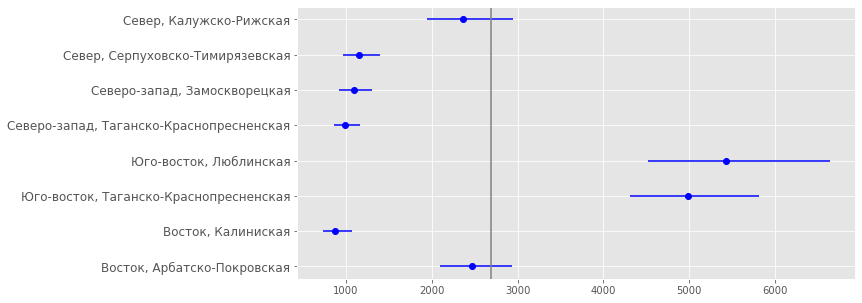

In [44]:
district = [
    'Север, Калужско-Рижская', 'Север, Серпуховско-Тимирязевская', 
    'Северо-запад, Замоскворецкая', 'Северо-запад, Таганско-Краснопресненская', 
    'Юго-восток, Люблинская', 'Юго-восток, Таганско-Краснопресненская',
    'Восток, Калиниская', 'Восток, Арбатско-Покровская'
]

center = df_agg['var'].values
step = np.array([df_agg['var'].values - df_agg['left'].values, 
                 df_agg['right'].values - df_agg['var'].values])

var_hat = df.price.var()

plt.figure(figsize=(10,5))

plt.errorbar(center, np.arange(center.size),  xerr = step, 
             capsize=0, fmt="o", color='blue')

plt.yticks(np.arange(center.size - 1, -1, -1), district, fontsize=12);
plt.axvline(var_hat, 0, color='grey');

__Выводы:__

- На Юго-Востоке самый большой разброс в ценах. Как покупатель, я найду здесь более разнообразные предложения. Так происходит из-за того, что с одной стороны районы близки к центру и здесь есть респектабельная недвижимость. С другой стороны, в районах довольно много советской застройки с плохой планировкой и ремонтом.

---

## 4. Доверительный интервал для отношения дисперсий

Предполагая нормальность распределения, построим $95\%$-ый доверительный интервал для отношения дисперсии стоимости квартир в монолитных домах и в панельных домах.

$$
\left( \frac{s_x^2}{s_y^2} \cdot F_{\frac{\alpha}{2}}(n_y-1, n_x-1) \leq \frac{\sigma_x^2}{\sigma_y^2} \leq \frac{s_x^2}{s_y^2} \cdot F_{1-\frac{\alpha}{2}}(n_y-1, n_x-1) \right)
$$

__Определение:__ случайная величина 

$$
Y = \frac{\frac{\chi^2_k}{k}}{\frac{\chi^2_m}{m}}
$$

имеет распределение Фишера с $k$ и $m$ степенями свободы, $Y \sim F(k,m)$

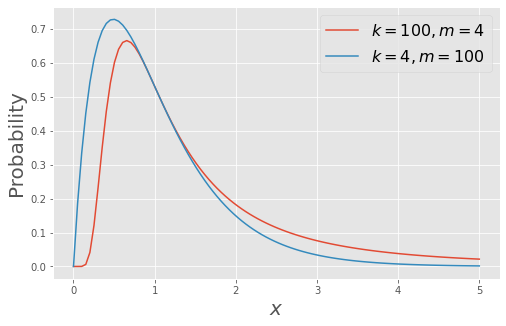

In [144]:
plt.figure(figsize=(8, 5))
x_f = np.linspace(0,5,100)

#par = [(1,10),(5,10),(10,10),(10,1),(50,20)]
par = [(100,4),(4,100)]

for k,m in par:
    rv = sts.f(k,m)
    pdf = rv.pdf(x_f)
    plt.plot(x_f, pdf, label="$k={},m={}$".format(k,m))
    
plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);

In [102]:
alpha = 0.05

x = df[df.brick == 1].price.values    # кирпичные и монолитные дома
y = df[df.brick == 0].price.values    # панельные дома

n, m = x.size - 1, y.size - 1
sn, sm = x.var(), y.var()

left = sm / sn * sts.f(n, m).ppf(alpha/2)
right = sm / sn * sts.f(n, m).ppf(1 - alpha/2)

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.5}" \
      .format(left, right, right - left))

Доверительный интервал [0.34243; 0.44536] ширины 0.10293


In [150]:
x.std(), y.std()

(65.30682500498871, 40.842745796012004)

In [151]:
n, m

(658, 1380)

In [148]:
sn, sm

(4264.981392232218, 1668.1298841576563)

__Выводы:__

- Единица не попала в доверительный интервал. Дисперсии в ценах на монолитное жильё и на панельное различаются. Цены на монолитное жильё обладают более высокой дисперсией.

In [103]:
left = sn / sm * sts.f(m, n).ppf(alpha/2)
right = sn / sm * sts.f(m, n).ppf(1 - alpha/2)

print("Sn/Sm = {:.5}, ДИ [{:.5}; {:.5}] ширины {:.5}" \
      .format(sn/sm, left, right, right - left))

Sn/Sm = 2.5567, ДИ [2.2454; 2.9203] ширины 0.67492


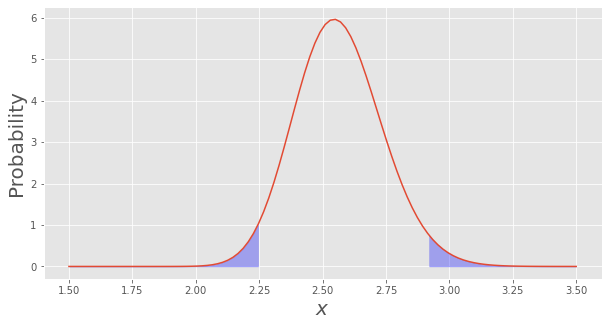

In [156]:
plt.figure(figsize=(10, 5))

x_f = np.linspace(1.5, 3.5, 100)
rv = sts.f(m, n)
pdf = rv.pdf(sm / sn * x_f)
plt.plot(x_f, pdf)

xq_l = np.linspace(1.5, left)
yq_l = rv.pdf(sm / sn * xq_l)
xq_u = np.linspace(right, 3.5)
yq_u = rv.pdf(sm / sn * xq_u)


plt.fill_between(xq_l, 0, yq_l, color='blue', alpha=0.3)
plt.fill_between(xq_u, 0, yq_u, color='blue', alpha=0.3)
plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20);

---

__Пример 4.1__ Кот Василий изучает неравенство в распределении объемов корма между двумя мисками: своей и своего друга - кота Бориса. Василий составил две независимые выборки из объемов поступающего в миски корма. Первая выборка включает 6 наблюдений, а вторая - 11. Предполагается, что объемы корма имеют нормальное распределение с неизвестными параметрами. Исправленная выборочная дисперсия по выборке из объемов корма миске Василия оказалось равно 
2, а по миске Бориса - 1. Постройте 90%-й доверительный интервал для отношения дисперсий корма и сделайте вывод о наличии либо отсутствии неравенства.

$$
\left( \frac{s_V^2}{s_B^2} \cdot F_{\frac{\alpha}{2}}(n_B-1, n_V-1) \leq \frac{\sigma_V^2}{\sigma_B^2} \leq \frac{s_V^2}{s_B^2} \cdot F_{1-\frac{\alpha}{2}}(n_B-1, n_V-1) \right)
$$

In [41]:
alpha = 0.1    # для 90% доверительного интервала

n_V = 6
n_B = 11

s2_V = 2
s2_B = 1

F_5 = sts.f(n_B - 1, n_V - 1).ppf(alpha/2)
F_95 = sts.f(n_B - 1, n_V - 1).ppf(1 - alpha/2)
F_5, F_95

(0.30067641395130307, 4.73506306969342)

In [45]:
left = s2_V / s2_B * F_5
right = s2_V / s2_B * F_95

print("S2_V/S2_B = {:.5}, ДИ [{:.5}; {:.5}] ширины {:.5}" \
      .format(s2_V/s2_B, left, right, right - left))

S2_V/S2_B = 2.0, ДИ [0.60135; 9.4701] ширины 8.8688


In [46]:
left = s2_B / s2_V * sts.f(n_V - 1, n_B - 1).ppf(alpha/2)
right = s2_B / s2_V * sts.f(n_V - 1, n_B - 1).ppf(1 - alpha/2)

print("S2_V/S2_B = {:.5}, ДИ [{:.5}; {:.5}] ширины {:.5}" \
      .format(s2_B/s2_V, left, right, right - left))

S2_V/S2_B = 0.5, ДИ [0.1056; 1.6629] ширины 1.5573


---

---

__А можно ли было пользоваться нормальным распределением?__

Распределение цен выглядит не очень нормальным.

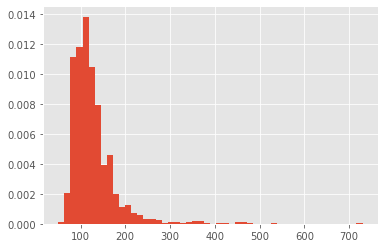

In [159]:
df.price.hist(bins=50,density=True);

Распределение логарифмов цен оказывается более похожим на нормальное.

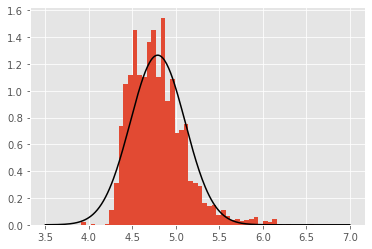

In [34]:
df.price.apply(np.log).hist(bins=50, density=True);

x = df.price.apply(np.log).values

xs = np.linspace(3.5, 7, 300)
ys = sts.norm(loc=np.mean(x), scale=np.std(x, ddof=1)).pdf(xs)
plt.plot(xs, ys, color="black");

Можно формально проверить гипотезу о том, имеет ли какая-то выборка нормальное распределение с помошью теста Колмогорова-Смирнова. О нём мы подробнее поговорим в будущем, а сейчас просто воспользуемся.

In [36]:
sts.kstest(df.price, 'norm', args=(df.price.mean(), df.price.std(ddof=1)))

KstestResult(statistic=0.1508501598050489, pvalue=5.415515510735646e-41)

In [37]:
sts.kstest(x, 'norm', args=(np.mean(x), np.std(x, ddof=1)))

KstestResult(statistic=0.07697286130504083, pvalue=5.856877429594e-11)

В обоих ситуациях pvalue очень низкое, это говорит о том, что выборка не распределена нормально.

---

---

Преобразование Бокса-Кокса:

$$
\begin{equation*}
 Y = X^{\lambda} = 
 \begin{cases}
   \frac{X^{\lambda} - 1}{\lambda}, & \lambda \neq 0 \\
   \log(X), & \lambda = 0
 \end{cases}
\end{equation*}
$$

Пусть имеется 2 города, $A$ и $B$, населением по 100 тысяч человек. В них имеется распределение зарплат:

E(A)=37.43, Var(A)=129.1; E(B)=43.6, Var(b)=254.6


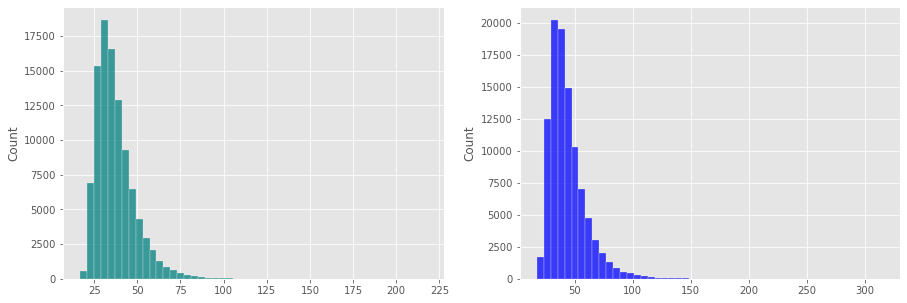

In [153]:
lognorm_A = sts.lognorm(s = 0.48, loc = 15, scale = 20)
lognorm_B = sts.lognorm(s = 0.52, loc = 15, scale = 25)

n_obs = 10**5

A = lognorm_A.rvs(n_obs)
B = lognorm_B.rvs(n_obs)

fig, ax=plt.subplots(1,2)
sns.histplot(A, ax=ax[0], bins = 50, color = 'teal')
sns.histplot(B, ax=ax[1], bins = 50, color = 'blue')
fig.set_figheight(5)
fig.set_figwidth(15)

print("E(A)={:.4}, Var(A)={:.4}; E(B)={:.4}, Var(b)={:.4}" \
      .format(A.mean(), A.var(), B.mean(), B.var()))

L_a=-0.7331, L_b=-0.5999


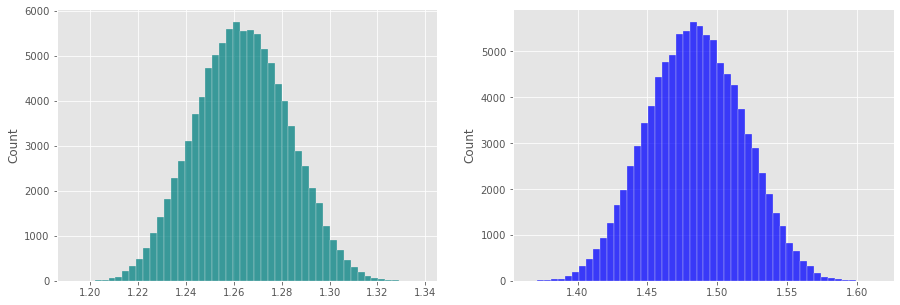

In [162]:
A_box, a_lambda = sts.boxcox(A)
B_box, b_lambda = sts.boxcox(B)

fig, ax=plt.subplots(1,2)
sns.histplot(A_box, ax=ax[0], bins = 50, color = 'teal')
sns.histplot(B_box, ax=ax[1], bins = 50, color = 'blue')
fig.set_figheight(5)
fig.set_figwidth(15)
print("L_a={:.4}, L_b={:.4}".format(a_lambda, b_lambda) )

In [163]:
n_A,n_B = A.size, B.size

diff = B.mean() - A.mean() 

diff_sd = np.sqrt(A.var(ddof=1)/n_A + B.var(ddof=1)/n_B)

left, right = sts.t.interval(0.95, df=99, loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}" \
      .format(left, right, right - left))

Доверительный интервал [6.048; 6.294] ширины 0.2458


In [165]:
F_5 = sts.f(n_A - 1, n_A - 1).ppf(alpha/2)
F_95 = sts.f(n_A - 1, n_A - 1).ppf(1 - alpha/2)

s2_A = A.var(ddof=1)
s2_B = B.var(ddof=1)

left = s2_B / s2_A * F_5
right = s2_B / s2_A * F_95

print("S2_B/S2_A = {:.5}, ДИ [{:.5}; {:.5}] ширины {:.5}" \
      .format(s2_B/s2_A, left, right, right - left))


S2_B/S2_A = 1.973, ДИ [1.9487; 1.9976] ширины 0.048916


Формируем выборки объёма $n = 100$

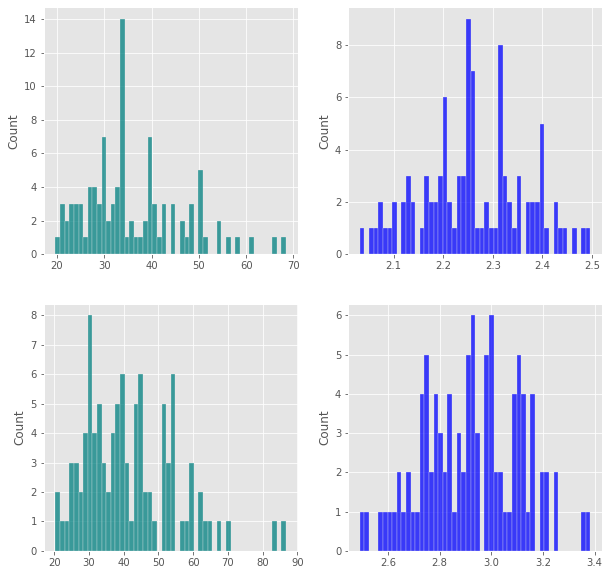

In [156]:
n = 100

smpl_A = np.random.choice(A, size = n)
smpl_B = np.random.choice(B, size = n)

smpl_A_box, L_sa = sts.boxcox(smpl_A)
smpl_B_box, L_sb = sts.boxcox(smpl_B)

fig, ax=plt.subplots(2,2)
sns.histplot(smpl_A, ax=ax[0][0], bins = 50, color = 'teal')
sns.histplot(smpl_A_box, ax=ax[0][1], bins = 50, color = 'blue')
sns.histplot(smpl_B, ax=ax[1][0], bins = 50, color = 'teal')
sns.histplot(smpl_B_box, ax=ax[1][1], bins = 50, color = 'blue')
fig.set_figheight(10)
fig.set_figwidth(10)

In [157]:
smpl_A_box.mean(),smpl_B_box.mean()

(2.260440476483567, 2.9245837480096815)

In [159]:
smpl_A_box.var(ddof=1),smpl_B_box.var(ddof=1)

(0.010963397231287926, 0.0354764424127577)

In [167]:
n_sA,n_sB = smpl_A_box.size, smpl_B_box.size

diff_s = smpl_B_box.mean() - smpl_A_box.mean() 

diff_sd_s = np.sqrt(smpl_A_box.var(ddof=1)/n_sA + smpl_B_box.var(ddof=1)/n_sB)

left_s, right_s = sts.t.interval(0.95, df=(n_sA + n_sB -2), loc=diff_s, scale=diff_sd_s)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}" \
      .format(left_s, right_s, right_s - left_s))

Доверительный интервал [0.6216; 0.7066] ширины 0.08499


In [168]:
F_5 = sts.f(n_sA - 1, n_sA - 1).ppf(alpha/2)
F_95 = sts.f(n_sA - 1, n_sA - 1).ppf(1 - alpha/2)

s2_sA = smpl_A_box.var(ddof=1)
s2_sB = smpl_B_box.var(ddof=1)

left = s2_sB / s2_sA * F_5
right = s2_sB / s2_sA * F_95

print("S2_sB/S2_sA = {:.5}, ДИ [{:.5}; {:.5}] ширины {:.5}" \
      .format(s2_sB/s2_sA, left, right, right - left))

S2_sB/S2_sA = 3.2359, ДИ [2.1772; 4.8093] ширины 2.6321


---

---

# Подборка формул:

__Доверительный интервал для математического ожидания при известной дисперсии $\sigma^2$__

$$
\left( \bar X - Z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar X + Z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}  \right)
$$

__Доверительный интервал для математического ожидания при неизвестной дисперсии__

$$
\left( \bar X - t_{1-\frac{\alpha}{2}}(n-1) \frac{s}{\sqrt{n}} \leq \mu \leq \bar X + t_{1-\frac{\alpha}{2}}(n-1) \frac{s}{\sqrt{n}}  \right)
$$


__Доверительный интервал для разницы мат. ожиданий при известных дисперсиях $\sigma_x^2$, $\sigma_y^2$__

$$
\left( (\bar X - \bar Y) - Z_{1-\frac{\alpha}{2}} \sqrt{\frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{m} } \leq \mu_x - \mu_y \leq (\bar X - \bar Y) + Z_{1-\frac{\alpha}{2}} \sqrt{\frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{m} }  \right) 
$$

__Доверительный интервал для разницы математических ожиданий при равных неизвестных дисперсиях__

$$
\left( (\bar X - \bar Y) - t_{1-\frac{\alpha}{2}}(n+m-2) \sqrt{\frac{\hat S^2}{n}+\frac{\hat S^2}{m}} \leq \mu_x - \mu_y \leq (\bar X - \bar Y) + t_{1-\frac{\alpha}{2}}(n+m-2) \sqrt{\frac{\hat S^2}{n}+\frac{\hat S^2}{m}} \right)
$$

$$
\hat S^2 = \frac{(n-1)s_x^2 + (m-1)s_y^2}{(n-1)+(m-1)}
$$

__Доверительный интервал для дисперсии при неизвестном математическом ожидании__

$$
\left( \frac{(n-1)s^2}{\chi_{1-\frac{\alpha}{2}}^2(n-1)} \leq \sigma^2 \leq \frac{(n-1)s^2}{\chi_{\frac{\alpha}{2}}^2(n-1)} \right)
$$

__Доверительный интервал для отношения дисперсий при неизвестных математических ожиданиях__

$$
\left( F_{\frac{\alpha}{2}}(n_y-1, n_x-1)\frac{s_x^2}{s_y^2} \leq \frac{\sigma_x^2}{\sigma_y^2} \leq F_{1-\frac{\alpha}{2}}(n_y-1, n_x-1)\frac{s_x^2}{s_y^2} \right)
$$

---

---

# Домашнее задание <a class="anchor" id="HW"></a>

Выручка фирмы в любой день является нормально распределенной случайной величиной с математическим ожиданием $\mu_X$ и дисперсией $\sigma_X^2$. При этом она не зависит от выручки, полученной в предыдущие дни. В первый день фирма заработала 10 денежных единиц, во второй 12, в третий 15, в четвертый 18 и в пятый 25. Издержки фирмы, которые также имеют нормальное распределение $N(\mu_Y, \sigma_Y^2)$ и не зависят от выручки, в соответствующие дни составили 5, 10, 15, 20 и 25 денежных единиц. Известно, что $\sigma_Y^2 = 0.81\sigma_X^2$

1. Найдите реализацию 60%-го доверительного интервала для математического ожидания дневной выручки фирмы.

2. Повторите предыдущий пункт принимая во внимание то, что $\sigma_X^2 = 30$ (не распространяется на последующие пункты).

3. Найдите реализацию 60%-го доверительного интервала для стандартного отклонения дневной выручки фирмы.

4. Найдите реализацию 60%-го доверительного интервала для математического ожидания прибыли фирмы, учитывая, что помимо указанных выше издержек она выплачивает налог в размере 10% от выручки.

5. Повторите предыдущий пункт учитывая, что $\sigma_Y^2 = 50$ (не распространяется на последующие пункты).